In [53]:
Pkg.resolve() # Installiert alle dependiencies aus Project.toml auf dem Rechner. Muss nur einmal ausgeführt werden.

  No Changes to `C:\Users\Chris\Documents\GitHub\AMO_Project\Project.toml`
  No Changes to `C:\Users\Chris\Documents\GitHub\AMO_Project\Manifest.toml`

In [7]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `c:\Users\Chris\Documents\GitHub\AMO_Project`

In [48]:
using CSV, DataFrames

In [41]:
gr()

Plots.GRBackend()

### Wind Data

The wind data consists of wind power measurements contributed by Energinet.dk.
Already got used by Pinson2013.

Data is provided for 15 zones through western Denmark. For the ease of use and following the 24-bus model we will reduce this number similar to Pinson2013.  
Drops in power generation can be observed in the data over multiple zones, the zonal classification from Pinson2013 is followed.

The given wind generators from the 24-bus system provide capacities ranging from 300 - 500.  
A breakdown of their capacity shows them with:  
1 - 31% / 2 - 31% / 3 - 19% / 4 - 19%

We will take the aggregated zones proposed by Pinson as follows:
|Agg. zone|   Orig. zones   |  % of capacity  | % of cap. (orig)|
| --- | --- | --- | --- |
|1   |        1, 2, 3     |    31          |    31|
|2     |      5, 6, 7      |   19         |     18|
|3|           4, 8, 9      |   19         |     17|
|4 |          10 ... 15     |  31         |     33|

Deviation of 2 percent from the originally proposed zones by combining zone 4 and 5 will be adequate.

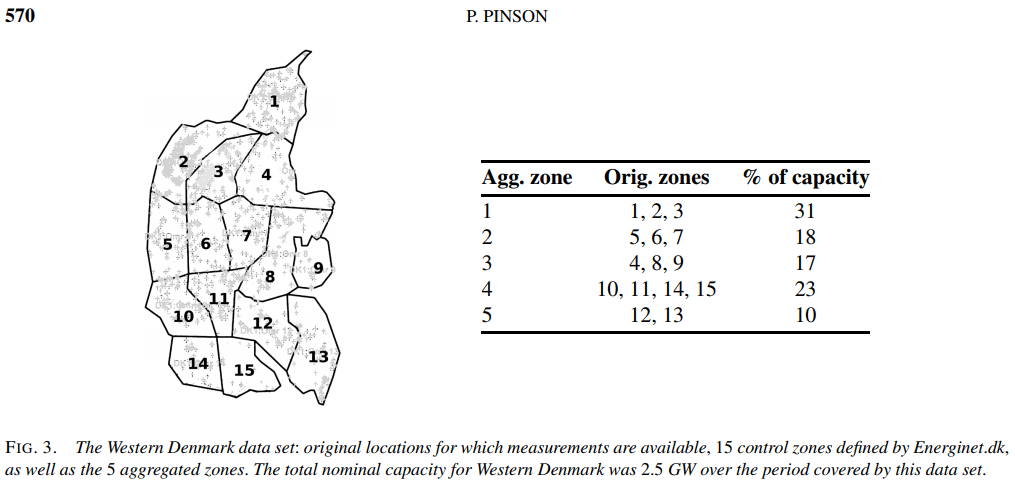

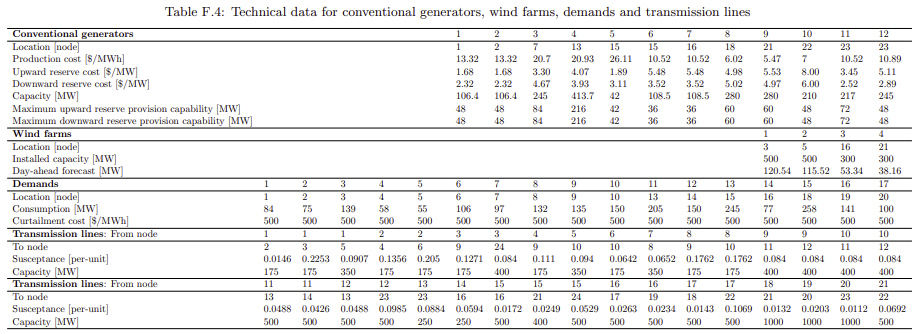

In [42]:
display("image/png", read("./resources/Wind_WesternDenmarkZones.PNG"))
display("image/png", read("./resources/Model_table.PNG"))

In [12]:
df_zone1 = DataFrame(CSV.File("./data/scen_zone1.csv"))
df_zone2 = DataFrame(CSV.File("./data/scen_zone2.csv"))
df_zone3 = DataFrame(CSV.File("./data/scen_zone3.csv"))
df_zone4 = DataFrame(CSV.File("./data/scen_zone4.csv"))
df_zone5 = DataFrame(CSV.File("./data/scen_zone5.csv"))
df_zone6 = DataFrame(CSV.File("./data/scen_zone6.csv"))
df_zone7 = DataFrame(CSV.File("./data/scen_zone7.csv"))
df_zone8 = DataFrame(CSV.File("./data/scen_zone8.csv"))
df_zone9 = DataFrame(CSV.File("./data/scen_zone9.csv"))
df_zone10 = DataFrame(CSV.File("./data/scen_zone10.csv"))
df_zone11 = DataFrame(CSV.File("./data/scen_zone11.csv"))
df_zone12 = DataFrame(CSV.File("./data/scen_zone12.csv"))
df_zone13 = DataFrame(CSV.File("./data/scen_zone13.csv"))
df_zone14 = DataFrame(CSV.File("./data/scen_zone14.csv"))
df_zone15 = DataFrame(CSV.File("./data/scen_zone15.csv"))

Row,Column1,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,⋯
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1,0.371117,0.662086,0.5357,0.603451,0.51989,0.257575,0.242698,0.422713,0.333244,0.38121,0.375533,0.30072,0.568915,0.495787,0.478888,0.570639,0.442377,0.569477,0.359871,0.440192,0.554067,0.506887,0.514398,0.415218,0.574183,0.560786,0.631257,0.59982,0.545187,0.499297,0.440373,0.463617,0.520877,0.353969,0.344481,0.536696,0.389077,0.371873,0.53732,0.328651,0.533677,0.486954,0.50034,0.490062,0.373293,0.443989,0.577741,0.558678,0.572048,0.461396,0.502364,0.59533,0.49337,0.453528,0.308255,0.444532,0.660925,0.455309,0.347584,0.545159,0.488822,0.563676,0.571264,0.536215,0.499437,0.487583,0.579475,0.482638,0.49305,0.427807,0.386784,0.521975,0.592278,0.422674,0.579202,0.423256,0.463327,0.507384,0.516821,0.506778,0.508896,0.484166,0.50682,0.514545,0.543345,0.401925,0.471203,0.489364,0.53925,0.424157,0.582391,0.575226,0.456459,0.551062,0.498603,0.598582,0.582231,0.528528,0.272205,⋯
2,2,0.35851,0.669774,0.575595,0.666563,0.632002,0.340356,0.315009,0.430452,0.500007,0.362473,0.564836,0.411092,0.594787,0.558486,0.567993,0.612299,0.480795,0.646278,0.32322,0.576374,0.536356,0.500176,0.542654,0.40148,0.610385,0.581368,0.663819,0.65413,0.622567,0.587062,0.41989,0.590368,0.621993,0.379553,0.38874,0.607874,0.50928,0.438079,0.623107,0.32825,0.57768,0.525782,0.458397,0.504876,0.367168,0.406318,0.580835,0.586451,0.628038,0.523294,0.4727,0.648423,0.516886,0.570178,0.380813,0.375823,0.648346,0.538061,0.523597,0.485344,0.593598,0.588445,0.608069,0.605927,0.539391,0.572186,0.621302,0.534523,0.537954,0.339327,0.498181,0.572628,0.638188,0.428348,0.575411,0.44872,0.539316,0.570986,0.426911,0.384107,0.532156,0.551578,0.518845,0.516463,0.502363,0.355866,0.557287,0.586113,0.643863,0.5432,0.496139,0.572377,0.565896,0.620755,0.45632,0.626056,0.579026,0.42987,0.401497,⋯
3,3,0.395214,0.707754,0.599367,0.80088,0.625999,0.408505,0.356927,0.416672,0.624431,0.402405,0.641325,0.552084,0.637755,0.559381,0.581027,0.679273,0.570425,0.716677,0.384426,0.588149,0.572339,0.589204,0.654181,0.460654,0.661681,0.584709,0.726004,0.702821,0.665346,0.667009,0.526708,0.688007,0.670652,0.412914,0.419491,0.639682,0.568226,0.461907,0.679294,0.383049,0.628286,0.610356,0.560327,0.583446,0.479542,0.501213,0.672058,0.634741,0.754544,0.614209,0.563365,0.658873,0.578276,0.669059,0.371642,0.507132,0.696172,0.602946,0.526687,0.566052,0.620421,0.651802,0.597426,0.660609,0.626669,0.642038,0.692388,0.550716,0.575896,0.392772,0.647375,0.63204,0.626104,0.540922,0.604041,0.524748,0.584133,0.613329,0.462486,0.526837,0.532736,0.594551,0.607782,0.572783,0.542343,0.381757,0.59272,0.618943,0.700563,0.485395,0.497798,0.632064,0.576843,0.637696,0.440068,0.614861,0.644751,0.499593,0.493915,⋯
4,4,0.536899,0.74923,0.607571,0.740903,0.692264,0.43554,0.408065,0.398581,0.604054,0.419214,0.676364,0.643737,0.721405,0.558647,0.633844,0.

In [27]:
df_aggr_zone1 = (df_zone1 .+ df_zone2 .+ df_zone3) ./ 3
df_aggr_zone2 = (df_zone5 .+ df_zone6 .+ df_zone7) ./ 3
df_aggr_zone3 = (df_zone4 .+ df_zone8 .+ df_zone9) ./ 3
df_aggr_zone4 = (df_zone10 .+ df_zone11 .+ df_zone12 .+ df_zone13 .+ df_zone14 .+ df_zone15) ./ 6

Row,Column1,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1.0,0.460712,0.648148,0.541166,0.555621,0.448747,0.400697,0.382334,0.475826,0.47091,0.556215,0.327613,0.328669,0.618304,0.585977,0.463758,0.573812,0.519264,0.609233,0.398293,0.439895,0.533893,0.511091,0.566949,0.475645,0.505319,0.552736,0.556365,0.582211,0.47164,0.429848,0.474936,0.555854,0.444897,0.459459,0.429915,0.57145,0.528331,0.461513,0.585935,0.458623,0.55784,0.460269,0.557456,0.526377,0.459981,0.497143,0.500185,0.57502,0.557827,0.49809,0.471885,0.554893,0.480921,0.470417,0.42644,0.476232,0.664498,0.45049,0.482755,0.561139,0.516846,0.551779,0.638394,0.525703,0.493478,0.478384,0.603138,0.550352,0.412681,0.50582,0.482417,0.457321,0.603654,0.524602,0.575885,0.463528,0.484281,0.468105,0.498948,0.471476,0.512692,0.494252,0.521015,0.473535,0.500542,0.533908,0.536053,0.466262,0.58442,0.519892,0.502978,0.632441,0.523764,0.456042,0.489996,0.597277,0.65743,0.534248,0.431999,⋯
2,2.0,0.486223,0.671026,0.5996,0.638579,0.563549,0.447993,0.458649,0.497557,0.558122,0.558302,0.452529,0.440951,0.641823,0.653471,0.548226,0.583617,0.565408,0.64784,0.430396,0.530362,0.536157,0.517274,0.606914,0.515573,0.509698,0.609373,0.591902,0.621216,0.513437,0.4594,0.502776,0.666528,0.536919,0.476349,0.503028,0.591626,0.620356,0.492896,0.64426,0.469937,0.633292,0.534778,0.594561,0.525335,0.488849,0.505309,0.5536,0.624181,0.613614,0.558759,0.468227,0.588205,0.516907,0.576078,0.453514,0.475872,0.651461,0.519939,0.571675,0.567712,0.590538,0.583841,0.697775,0.611762,0.547156,0.552728,0.620094,0.58865,0.50141,0.479403,0.555206,0.535189,0.629658,0.557528,0.570712,0.48276,0.552345,0.548955,0.469957,0.462106,0.532994,0.545729,0.584442,0.517922,0.513655,0.519513,0.606682,0.551742,0.677929,0.546774,0.44516,0.593004,0.621288,0.5076,0.533423,0.662537,0.65032,0.473354,0.492086,⋯
3,3.0,0.535224,0.694164,0.613952,0.695899,0.577816,0.492614,0.487679,0.516792,0.635972,0.588161,0.528696,0.525391,0.678321,0.658691,0.561015,0.655315,0.596733,0.673172,0.444253,0.570928,0.572122,0.573685,0.68408,0.538208,0.576737,0.626168,0.647217,0.634808,0.562923,0.499605,0.543319,0.738569,0.568037,0.549114,0.565717,0.640231,0.669425,0.573002,0.709995,0.502131,0.685411,0.628773,0.63646,0.585187,0.566628,0.558432,0.631688,0.644429,0.700512,0.624533,0.561866,0.577496,0.564871,0.603547,0.466774,0.528907,0.67134,0.609858,0.577978,0.62831,0.629764,0.631429,0.668221,0.614621,0.57885,0.617778,0.68446,0.657605,0.571333,0.555595,0.63533,0.548281,0.641474,0.634216,0.601116,0.560593,0.540203,0.570861,0.502344,0.575303,0.551017,0.599298,0.650705,0.558629,0.546434,0.53639,0.644935,0.583808,0.731218,0.507514,0.472634,0.665159,0.643125,0.540476,0.561161,0.644665,0.68982,0.563383,0.552556,⋯
4,4.0,0.604685,0.778706,0.633709,0.688827,0.669354,0.523163,0.546323,0.565438,0.629104,0.612377,0.600476,0.628342,0.704391,0.627729,0.

In [28]:
df_aggr_zone1 = select!(df_aggr_zone1, Not(:Column1))
df_aggr_zone2 = select!(df_aggr_zone2, Not(:Column1))
df_aggr_zone3 = select!(df_aggr_zone3, Not(:Column1))
df_aggr_zone4 = select!(df_aggr_zone4, Not(:Column1))

Row,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.460712,0.648148,0.541166,0.555621,0.448747,0.400697,0.382334,0.475826,0.47091,0.556215,0.327613,0.328669,0.618304,0.585977,0.463758,0.573812,0.519264,0.609233,0.398293,0.439895,0.533893,0.511091,0.566949,0.475645,0.505319,0.552736,0.556365,0.582211,0.47164,0.429848,0.474936,0.555854,0.444897,0.459459,0.429915,0.57145,0.528331,0.461513,0.585935,0.458623,0.55784,0.460269,0.557456,0.526377,0.459981,0.497143,0.500185,0.57502,0.557827,0.49809,0.471885,0.554893,0.480921,0.470417,0.42644,0.476232,0.664498,0.45049,0.482755,0.561139,0.516846,0.551779,0.638394,0.525703,0.493478,0.478384,0.603138,0.550352,0.412681,0.50582,0.482417,0.457321,0.603654,0.524602,0.575885,0.463528,0.484281,0.468105,0.498948,0.471476,0.512692,0.494252,0.521015,0.473535,0.500542,0.533908,0.536053,0.466262,0.58442,0.519892,0.502978,0.632441,0.523764,0.456042,0.489996,0.597277,0.65743,0.534248,0.431999,0.576123
2,0.486223,0.671026,0.5996,0.638579,0.563549,0.447993,0.458649,0.497557,0.558122,0.558302,0.452529,0.440951,0.641823,0.653471,0.548226,0.583617,0.565408,0.64784,0.430396,0.530362,0.536157,0.517274,0.606914,0.515573,0.509698,0.609373,0.591902,0.621216,0.513437,0.4594,0.502776,0.666528,0.536919,0.476349,0.503028,0.591626,0.620356,0.492896,0.64426,0.469937,0.633292,0.534778,0.594561,0.525335,0.488849,0.505309,0.5536,0.624181,0.613614,0.558759,0.468227,0.588205,0.516907,0.576078,0.453514,0.475872,0.651461,0.519939,0.571675,0.567712,0.590538,0.583841,0.697775,0.611762,0.547156,0.552728,0.620094,0.58865,0.50141,0.479403,0.555206,0.535189,0.629658,0.557528,0.570712,0.48276,0.552345,0.548955,0.469957,0.462106,0.532994,0.545729,0.584442,0.517922,0.513655,0.519513,0.606682,0.551742,0.677929,0.546774,0.44516,0.593004,0.621288,0.5076,0.533423,0.662537,0.65032,0.473354,0.492086,0.641584
3,0.535224,0.694164,0.613952,0.695899,0.577816,0.492614,0.487679,0.516792,0.635972,0.588161,0.528696,0.525391,0.678321,0.658691,0.561015,0.655315,0.596733,0.673172,0.444253,0.570928,0.572122,0.573685,0.68408,0.538208,0.576737,0.626168,0.647217,0.634808,0.562923,0.499605,0.543319,0.738569,0.568037,0.549114,0.565717,0.640231,0.669425,0.573002,0.709995,0.502131,0.685411,0.628773,0.63646,0.585187,0.566628,0.558432,0.631688,0.644429,0.700512,0.624533,0.561866,0.577496,0.564871,0.603547,0.466774,0.528907,0.67134,0.609858,0.577978,0.62831,0.629764,0.631429,0.668221,0.614621,0.57885,0.617778,0.68446,0.657605,0.571333,0.555595,0.63533,0.548281,0.641474,0.634216,0.601116,0.560593,0.540203,0.570861,0.502344,0.575303,0.551017,0.599298,0.650705,0.558629,0.546434,0.53639,0.644935,0.583808,0.731218,0.507514,0.472634,0.665159,0.643125,0.540476,0.561161,0.644665,0.68982,0.563383,0.552556,0.718988
4,0.604685,0.778706,0.633709,0.688827,0.669354,0.523163,0.546323,0.565438,0.629104,0.612377,0.600476,0.628342,0.704391,0.627729,0.59

In [29]:
CSV.write("./data/aggr_zone1.csv", df_aggr_zone1)
CSV.write("./data/aggr_zone2.csv", df_aggr_zone2)
CSV.write("./data/aggr_zone3.csv", df_aggr_zone3)
CSV.write("./data/aggr_zone4.csv", df_aggr_zone4)

"./data/aggr_zone4.csv"